## Testing the BPASS isochrone at 10^7 years age.
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7 years age, solar metallicity, AKs=0.7, and distance of 100 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the mass luminosity relationshi of the cluster.
Important note when I use M_V, it is a pseudo-absolute magnitude. I.e. it is basically absolute magnitude without taking into account extinction.

Formula for pseudo-absolute magnitude:
pseudo-M_V = m_V - 5$log_{10}$(distance to cluster/ 10 pc)

## This is for tutorial as well as debugging and demonstration purposes.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(7.0, 0.7, 1000,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=4.50 for T= 48500 logg=3.98
Changing to T= 50000 for T=164324 logg=5.78
Changing to logg=5.00 for T=164324 logg=5.78
Changing to T= 50000 for T=102353 logg=5.41
Changing to logg=5.00 for T=102353 logg=5.41
Changing to T= 50000 for T= 69632 logg=4.38
Changing to logg=5.00 for T= 69632 logg=4.38
Changing to T= 50000 for T= 69390 logg=4.71
Changing to logg=5.00 for T= 69390 logg=4.71
Changing to T= 50000 for T=102877 logg=5.42
Changing to logg=5.00 for T=102877 logg=5.42
Changing to T= 50000 for T= 71453 logg=4.77
Changing to logg=5.00 for T= 71453 logg=4.77
Changing to T= 50000 for T=103588 logg=5.41
Changing to logg=5.00 for T=103588 logg=5.41
Changing to T= 50000 for T= 82465 logg=5.17
Changing to logg=5.00 for T= 82465 logg=5.17
Changing to logg=4.00 for T= 31125 logg=3.66
Changing to T= 50000 for T= 59860 logg=4.13
Changing to logg=5.00 for T= 59860 logg=4.13
Changing to logg=4.00 for T= 35763 logg=3.88
Changing to T= 50000 for T= 70651 logg=4.75
Changing to logg=5.0

Changing to logg=4.00 for T= 32498 logg=3.50
Changing to T= 50000 for T=103343 logg=5.41
Changing to logg=5.00 for T=103343 logg=5.41
Changing to T= 50000 for T=100716 logg=5.42
Changing to logg=5.00 for T=100716 logg=5.42
Changing to T= 50000 for T= 65121 logg=4.26
Changing to logg=5.00 for T= 65121 logg=4.26
Changing to T= 50000 for T= 74024 logg=4.48
Changing to logg=5.00 for T= 74024 logg=4.48
Changing to T= 50000 for T= 69684 logg=4.38
Changing to logg=5.00 for T= 69684 logg=4.38
Changing to T= 50000 for T=101513 logg=5.42
Changing to logg=5.00 for T=101513 logg=5.42
Changing to T= 50000 for T= 74302 logg=4.48
Changing to logg=5.00 for T= 74302 logg=4.48
Changing to T= 50000 for T= 93233 logg=5.17
Changing to logg=5.00 for T= 93233 logg=5.17
Changing to logg=4.50 for T= 41743 logg=3.70
Changing to T= 50000 for T= 74305 logg=4.48
Changing to logg=5.00 for T= 74305 logg=4.48
Changing to T= 50000 for T= 72751 logg=4.45
Changing to logg=5.00 for T= 72751 logg=4.45
Changing to T= 50000

Changing to logg=4.50 for T= 42886 logg=3.75
Changing to T= 50000 for T= 67473 logg=4.32
Changing to logg=5.00 for T= 67473 logg=4.32
Changing to T= 50000 for T=102134 logg=5.40
Changing to logg=5.00 for T=102134 logg=5.40
Changing to logg=2.00 for T= 11391 logg=0.99
Changing to logg=4.00 for T= 31478 logg=3.74
Changing to T= 50000 for T= 69920 logg=4.38
Changing to logg=5.00 for T= 69920 logg=4.38
Changing to T= 50000 for T= 68509 logg=4.34
Changing to logg=5.00 for T= 68509 logg=4.34
Changing to T= 50000 for T= 68223 logg=4.34
Changing to logg=5.00 for T= 68223 logg=4.34
Changing to T= 50000 for T= 69174 logg=4.37
Changing to logg=5.00 for T= 69174 logg=4.37
Changing to T= 50000 for T= 71717 logg=4.43
Changing to logg=5.00 for T= 71717 logg=4.43
Changing to logg=3.50 for T= 26285 logg=3.28
Changing to T= 50000 for T= 72144 logg=4.80
Changing to logg=5.00 for T= 72144 logg=4.80
Changing to logg=4.50 for T= 45454 logg=3.86
Changing to T= 50000 for T= 66764 logg=4.30
Changing to logg=5.

Changing to T= 50000 for T= 57106 logg=4.30
Changing to logg=5.00 for T= 57106 logg=4.30
Changing to T= 50000 for T= 74521 logg=4.49
Changing to logg=5.00 for T= 74521 logg=4.49
Changing to T= 50000 for T= 61325 logg=4.18
Changing to logg=5.00 for T= 61325 logg=4.18
Changing to T= 50000 for T= 70940 logg=4.41
Changing to logg=5.00 for T= 70940 logg=4.41
Changing to T= 50000 for T= 54369 logg=4.20
Changing to logg=5.00 for T= 54369 logg=4.20
Changing to T= 50000 for T= 69440 logg=4.37
Changing to logg=5.00 for T= 69440 logg=4.37
Changing to T= 50000 for T= 66364 logg=4.29
Changing to logg=5.00 for T= 66364 logg=4.29
Changing to logg=4.00 for T= 34156 logg=3.75
Changing to T= 50000 for T= 67126 logg=4.31
Changing to logg=5.00 for T= 67126 logg=4.31
Changing to T= 50000 for T=102113 logg=5.40
Changing to logg=5.00 for T=102113 logg=5.40
Changing to logg=3.00 for T= 20951 logg=2.96
Changing to T= 50000 for T= 74781 logg=4.49
Changing to logg=5.00 for T= 74781 logg=4.49
Changing to T= 50000

Changing to logg=4.00 for T= 31789 logg=3.54
Changing to T= 50000 for T= 95984 logg=4.82
Changing to logg=5.00 for T= 95984 logg=4.82
Changing to T= 50000 for T=102197 logg=5.40
Changing to logg=5.00 for T=102197 logg=5.40
Changing to T= 50000 for T= 61423 logg=4.19
Changing to logg=5.00 for T= 61423 logg=4.19
Changing to T= 50000 for T=103193 logg=5.40
Changing to logg=5.00 for T=103193 logg=5.40
Changing to T= 50000 for T= 50852 logg=4.07
Changing to logg=5.00 for T= 50852 logg=4.07
Changing to logg=4.00 for T= 31761 logg=3.51
Changing to T= 50000 for T=172330 logg=5.86
Changing to logg=5.00 for T=172330 logg=5.86
Changing to T= 50000 for T= 69844 logg=4.38
Changing to logg=5.00 for T= 69844 logg=4.38
Changing to T= 50000 for T= 76206 logg=4.80
Changing to logg=5.00 for T= 76206 logg=4.80
Changing to T= 50000 for T= 65890 logg=4.28
Changing to logg=5.00 for T= 65890 logg=4.28
Changing to T= 50000 for T=102527 logg=5.40
Changing to logg=5.00 for T=102527 logg=5.40
Changing to T= 50000

Changing to T= 50000 for T= 70672 logg=4.40
Changing to logg=5.00 for T= 70672 logg=4.40
Changing to logg=3.50 for T= 26974 logg=3.45
Changing to T= 50000 for T= 74307 logg=4.48
Changing to logg=5.00 for T= 74307 logg=4.48
Changing to T= 50000 for T= 64892 logg=4.26
Changing to logg=5.00 for T= 64892 logg=4.26
Changing to T= 50000 for T=132468 logg=5.53
Changing to logg=5.00 for T=132468 logg=5.53
Changing to T= 50000 for T=132764 logg=5.53
Changing to logg=5.00 for T=132764 logg=5.53
Changing to T= 50000 for T= 73264 logg=4.46
Changing to logg=5.00 for T= 73264 logg=4.46
Changing to T= 50000 for T= 74659 logg=4.49
Changing to logg=5.00 for T= 74659 logg=4.49
Changing to T= 50000 for T=101623 logg=5.42
Changing to logg=5.00 for T=101623 logg=5.42
Changing to T= 50000 for T=170279 logg=5.84
Changing to logg=5.00 for T=170279 logg=5.84
Changing to T= 50000 for T= 74425 logg=4.48
Changing to logg=5.00 for T= 74425 logg=4.48
Changing to T= 50000 for T= 72404 logg=4.44
Changing to logg=5.00

Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T=101606 logg=5.41
Changing to logg=5.00 for T=101606 logg=5.41
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to T= 50000 for T=100510 logg=5.42
Changing to logg=5.00 for T=100510 logg=5.42
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to T= 50000 for T= 71000 logg=4.40
Changing to logg=5.00 for T= 71000 logg=4.40
Changing to logg=2.00 for T=  9772 logg=1.67
Changing to T= 50000 for T= 72345 logg=4.44
Changing to logg=5.00 for T= 72345 logg=4.44
Changing to T= 50000 for T= 70474 logg=4.40
Changing to logg=5.00 for T= 70474 logg=4.40
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing 

Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 84680 logg=5.43
Changing to logg=5.00 for T= 84680 logg=5.43
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=1.50 for T=  8770 logg=1.44
Changing to T= 50000 for T= 72399 logg=4.45
Changing to logg=5.00 for T= 72399 logg=4.45
Changing to T= 50000 for T= 65076 logg=4.24
Changing to logg=5.00 for T= 65076 logg=4.24
Changing to T= 50000 for T= 66627 logg=4.29
Changing to logg=5.00 for T= 66627 logg=4.29
Changing to logg=0.00 for T=  3325 logg=-0.66
Changing to logg=0.00 for T=  3554 logg=-0.25
Changing to T= 50000 for T= 69929 logg=4.39
Changing to logg=5.00 for T= 69929 logg=4.39
Changing to logg=3.50 for T= 26699 logg=2.90
Changing to logg=4.50 for T= 43064 logg=3.76
Changing to T= 50000 for T= 62509 logg=4.18
Changing to logg=5.00 for T= 62509 logg=4.18
Changing to 

Changing to T= 50000 for T= 54200 logg=3.98
Changing to logg=5.00 for T= 54200 logg=3.98
Changing to T= 50000 for T= 71836 logg=4.43
Changing to logg=5.00 for T= 71836 logg=4.43
Changing to T=  1200 for T=   692 logg=4.44
Changing to T= 50000 for T=101906 logg=5.42
Changing to logg=5.00 for T=101906 logg=5.42
Changing to T=  1200 for T=   692 logg=4.44
Changing to T=  1200 for T=   692 logg=4.44
Changing to T= 50000 for T= 70351 logg=4.40
Changing to logg=5.00 for T= 70351 logg=4.40
Changing to T= 50000 for T= 70066 logg=4.37
Changing to logg=5.00 for T= 70066 logg=4.37
Changing to T= 50000 for T= 96627 logg=5.44
Changing to logg=5.00 for T= 96627 logg=5.44
Changing to T= 50000 for T= 70306 logg=4.38
Changing to logg=5.00 for T= 70306 logg=4.38
Changing to T= 50000 for T= 72375 logg=4.45
Changing to logg=5.00 for T= 72375 logg=4.45
Changing to logg=0.00 for T=  3317 logg=-0.70
Changing to T= 50000 for T= 72552 logg=4.46
Changing to logg=5.00 for T= 72552 logg=4.46
Changing to logg=1.50

M =   5.012 Msun  T =   nan K  m_ubv_U =  nan
M =  14.000 Msun  T = 26300 K  m_ubv_U = 16.26
M =  13.000 Msun  T = 26107 K  m_ubv_U = 16.60
M =   1.200 Msun  T =  7594 K  m_ubv_U = 24.03
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =  19.000 Msun  T = 101672 K  m_ubv_U = 20.05
M =  15.000 Msun  T = 26270 K  m_ubv_U = 15.93
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =  20.000 Msun  T = 65184 K  m_ubv_U = 17.26
M =   3.162 Msun  T =   nan K  m_ubv_U =  nan
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   8.500 Msun  T = 22028 K  m_ubv_U = 18.12
M =   9.000 Msun  T = 22647 K  m_ubv_U = 17.93
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   1.200 Msun  T =  5987 K  m_ubv_U = 26.20
M =  14.000 Msun  T = 26300 K  m_ubv_U = 16.26
M =   3.162 Msun  T =   nan K  m_ubv_U =  nan
M =   0.900 Msun  T =  6908 K  m_ubv_U = 24.58
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =  6560 K  m_ubv_U = 24.99
M =  13.000 Msun  T =

M =  15.000 Msun  T = 26270 K  m_ubv_B = 16.91
M =   1.400 Msun  T =   nan K  m_ubv_B =  nan
M =  20.000 Msun  T = 65184 K  m_ubv_B = 18.37
M =   3.162 Msun  T =   nan K  m_ubv_B =  nan
M =   3.981 Msun  T =   nan K  m_ubv_B =  nan
M =   8.500 Msun  T = 22028 K  m_ubv_B = 18.96
M =   9.000 Msun  T = 22647 K  m_ubv_B = 18.79
M =   1.400 Msun  T =   nan K  m_ubv_B =  nan
M =   1.200 Msun  T =  5987 K  m_ubv_B = 26.22
M =  14.000 Msun  T = 26300 K  m_ubv_B = 17.22
M =   3.162 Msun  T =   nan K  m_ubv_B =  nan
M =   0.900 Msun  T =  6908 K  m_ubv_B = 24.66
M =   3.981 Msun  T =   nan K  m_ubv_B =  nan
M =   1.400 Msun  T =  6560 K  m_ubv_B = 25.07
M =  13.000 Msun  T = 26107 K  m_ubv_B = 17.56
Secondaries
M =   1.700 Msun  T =  7893 K  m_ubv_B = 23.93
M =  11.000 Msun  T = 24743 K  m_ubv_B = 18.14
M =   8.400 Msun  T = 23278 K  m_ubv_B = 19.16
M =  18.000 Msun  T =  3545 K  m_ubv_B = 17.49
M =   1.400 Msun  T =  6571 K  m_ubv_B = 25.06
M =   0.700 Msun  T =  4039 K  m_ubv_B = 30.18
M =  12

M =   1.400 Msun  T =   nan K  m_ubv_I =  nan
M =   1.200 Msun  T =  5987 K  m_ubv_I = 17.81
M =  14.000 Msun  T = 26300 K  m_ubv_I = 10.89
M =   3.162 Msun  T =   nan K  m_ubv_I =  nan
M =   0.900 Msun  T =  6908 K  m_ubv_I = 16.77
M =   3.981 Msun  T =   nan K  m_ubv_I =  nan
M =   1.400 Msun  T =  6560 K  m_ubv_I = 17.00
M =  13.000 Msun  T = 26107 K  m_ubv_I = 11.22
Secondaries
M =   1.700 Msun  T =  7893 K  m_ubv_I = 16.45
M =  11.000 Msun  T = 24743 K  m_ubv_I = 11.78
M =   8.400 Msun  T = 23278 K  m_ubv_I = 12.77
M =  18.000 Msun  T =  3545 K  m_ubv_I = 5.92
M =   1.400 Msun  T =  6571 K  m_ubv_I = 17.00
M =   0.700 Msun  T =  4039 K  m_ubv_I = 19.95
M =  12.000 Msun  T = 25146 K  m_ubv_I = 11.37
M =   4.500 Msun  T = 16036 K  m_ubv_I = 14.18
M =   9.000 Msun  T = 24171 K  m_ubv_I = 12.59
M =  16.000 Msun  T = 25206 K  m_ubv_I = 10.10
M =   0.960 Msun  T =  5540 K  m_ubv_I = 18.39
M =  21.000 Msun  T =  3288 K  m_ubv_I = 5.20
M =   4.800 Msun  T = 16705 K  m_ubv_I = 14.04
M =   

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110. Note that we will have a phase of 110 in order to indicate a mystery compact remnant that BPASS provides for NEWSECMODS (secondary star models with compact primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged. Secondary stars that have merged with their primaries have designation of phase -99.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101 or x==110) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

4.591806913365015

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

5.898517399939001

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

5.7676806790772

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.178243141326868

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.024477317485913

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

3.96292885544605

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.194452095013302

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

3.963068092288352

In [13]:
np.median(iso1.secondaries['logg'][[np.where(~np.isnan(iso1.secondaries['logg']))]])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


4.239978886358815

Text(0.5, 0, 'logg in cgs')

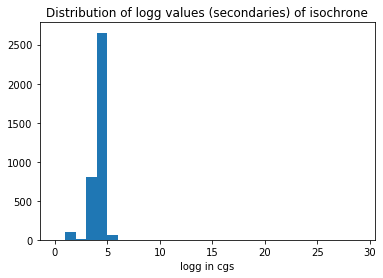

In [14]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

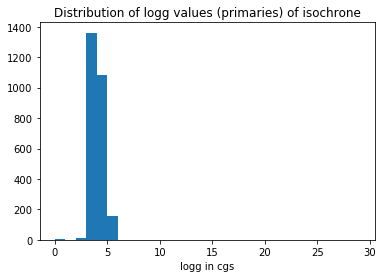

In [15]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

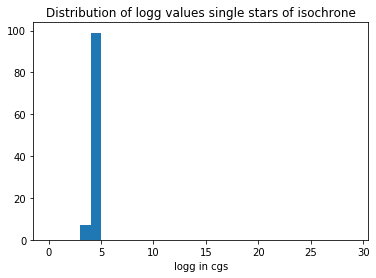

In [16]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Now, for comparison, I will create a MISTv.1 isochrone of the same metallicity, age, distance from earth, and AKs.

In [17]:
iso2=synthetic.IsochronePhot(7.0, 0.7, 1000, math.log(1), recomp=True) # New MIST v.1 isochrone for same metallicity

Changing to logg=3.50 for T= 26068 logg=3.41
Changing to logg=3.50 for T= 26167 logg=3.41
Changing to logg=3.50 for T= 26263 logg=3.42
Changing to logg=3.50 for T= 26355 logg=3.42
Changing to logg=3.50 for T= 26443 logg=3.42
Changing to logg=3.50 for T= 26528 logg=3.43
Changing to logg=3.50 for T= 26609 logg=3.43
Changing to logg=3.50 for T= 26685 logg=3.43
Changing to logg=3.50 for T= 26758 logg=3.43
Changing to logg=3.50 for T= 26826 logg=3.44
Changing to logg=3.50 for T= 26889 logg=3.44
Changing to logg=3.50 for T= 26943 logg=3.44
Changing to logg=3.50 for T= 26985 logg=3.44
Changing to logg=3.50 for T= 27008 logg=3.45
Changing to logg=3.50 for T= 27006 logg=3.45
Changing to logg=3.50 for T= 26955 logg=3.45
Changing to logg=3.50 for T= 26861 logg=3.44
Changing to logg=3.50 for T= 26740 logg=3.44
Changing to logg=3.50 for T= 26600 logg=3.44
Changing to logg=3.50 for T= 26446 logg=3.43
Changing to logg=3.50 for T= 26289 logg=3.42
Changing to logg=3.50 for T= 26128 logg=3.41
Changing t

Finding the max, median, and mean of the MISTv.1 isochrone's logg values

In [18]:
np.max(iso2.points['logg'])

4.3301956912058674

(array([ 60.,  57.,  78., 149., 210.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

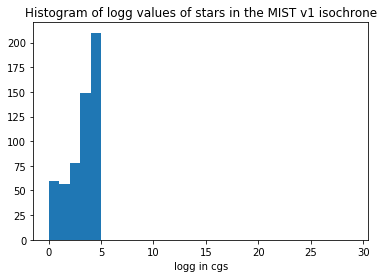

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [20]:
np.median(iso2.points['logg'])

3.44315451781853

In [21]:
np.mean(iso2.points['logg'])

3.1148461826295915

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [23]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the beginnings of the subgiant branch. That turnoff will turn out to be quite important when using the clusters to find age of real stellar populations.\n But first, let's look at the isochrones and plot the observers' and theorist's HR diagrams and juxtapose the evolution models.

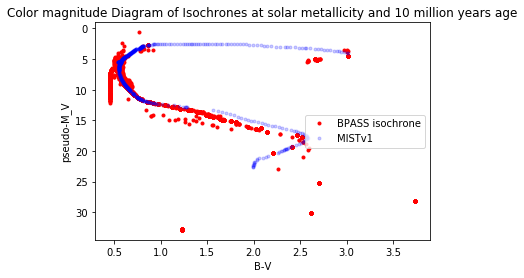

In [24]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100), "b.", label="MISTv1", alpha =0.2)
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

Hmm, where is the vertical line coming from

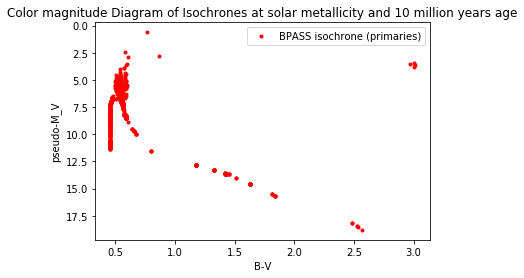

In [25]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100), "r.",  label="BPASS isochrone (primaries)")
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

In [26]:
line = iso1.primaries[np.where(((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])>0.45) & ((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])<=0.4583))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


In [27]:
iso1.secondaries[np.where(((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])>0.45) & ((iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"])<=0.4583))[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
13.799999999999999,nan,nan,nan,nan,nan,False,nan,-99.0,True,1,nan,nan,nan,nan,nan
9.5,-0.5557224086880292,2.2887161233430257e+30,24794.76520054689,2913681009.4049573,4.176072334799042,False,9.594994,5.0,False,1,17.8668993439764,18.21510299379242,18.781338702295965,15.719371665177988,12.420461269950247
6.3,-0.6339254086880293,4.910683329496217e+29,19694.72857904807,2139055255.8102043,4.262791119712317,False,6.314275,5.0,False,1,19.170249268790588,19.314348916399446,19.92861031291516,16.79427870544282,13.450320380725843
7.2,-0.7784414086880291,8.085221628723427e+29,21291.19315929503,2348615935.976151,4.241553205486155,False,7.248791,5.0,False,1,18.75528427737999,18.97119178608045,19.56757020940968,16.46039665124656,13.13266403403903
1.9000000000000001,-0.9394644086880293,4.9296028165026596e+27,8701.016655822772,1098074998.3136752,4.32040877119988,False,1.900033,5.0,False,1,23.39283806976404,22.379521803694196,23.351923919495224,19.71528480396945,16.140203918534393
3.6,-0.9429554086880292,6.222170809834737e+28,13881.295518478331,1532752394.8293374,4.308482880246526,False,3.601764,5.0,False,1,20.872480753181573,20.643892137053573,21.34874657013162,18.083016620305024,14.660117215142398
9.5,-0.2920094086880294,2.292460857696828e+30,24821.612992133352,2909658389.697238,4.175687972700132,False,9.560054,5.0,False,1,17.86696930424292,18.21603154348489,18.782067069849127,15.720395764027405,12.421667358429616
7.2,-1.1750194086880292,8.087083534154566e+29,21265.715527416894,2354517937.319119,4.24117564749745,False,7.278938,5.0,False,1,18.75310779737664,18.967938263407223,19.564566930378334,16.457004970270127,13.129019477896987


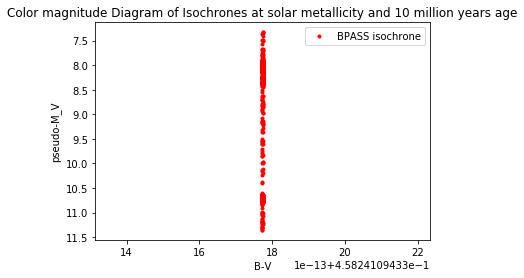

In [28]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(line['m_ubv_B']-line["m_ubv_V"], line["m_ubv_V"]-5*np.log10(100), "r.",  label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

What exactly is causing this line. We need to look specifically at the properties of the stars there. Specifically current mass, source code of the star, logg, initial mass, Teff.

In [29]:
line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
23.0,1.1210679301777608e+32,164323.62237025567,464520798.8350329,5.77981864125865,True,9.82587,5.0,1,20.396042839410306,21.051214183602358,21.50945527793413,18.58376769420131,15.352840434830407
19.0,2.2943619365502126e+31,102352.86413287924,541651766.9537815,5.407964411683066,True,5.67462,5.0,1,20.06246783941031,20.717639183602362,21.175880277934134,18.250192694201317,15.019265434830414
21.0,5.334600841111398e+31,69632.1812820603,1784514841.3507247,4.376595891814837,True,5.73018,5.0,1,17.473467839410308,18.128639183602356,18.58688027793413,15.66119269420131,12.430265434830408
18.0,2.4126922495730148e+31,69390.49730731636,1208481939.128923,4.707861547685258,True,5.635,5.0,1,18.31986783941031,18.97503918360236,19.433280277934134,16.507592694201314,13.276665434830411
19.0,2.2289069022860066e+31,102877.40476585295,528439367.681037,5.415881639476231,True,5.50065,5.0,1,20.116092839410307,20.771264183602355,21.22950527793413,18.30381769420131,15.072890434830407
18.0,2.308617211297434e+31,71452.9230604951,1114872400.2793968,4.77492723943202,True,5.59654,5.0,1,18.49494283941031,19.15011418360236,19.60835527793413,16.682667694201314,13.451740434830409
19.0,2.3747720514852548e+31,103588.13163568493,537997384.3686986,5.4131014084392,True,5.66492,5.0,1,20.07716783941031,20.73233918360236,21.19058027793413,18.264892694201315,15.033965434830412
18.0,1.6103561236825713e+31,82465.06393114667,699053097.1997061,5.165510007374787,True,5.40832,5.0,1,19.508517839410306,20.163689183602358,20.62193027793413,17.69624269420131,14.465315434830407


In [30]:
np.unique(line['mass_current'])

4.44683
4.44977
4.5998
4.65934
4.82873
4.84274
4.87299
4.87838
4.93716
4.94025
4.94141


In [31]:
np.unique(line['source'])

1


In [32]:
np.unique(np.round(line['logg'], 1))

array([3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.8, 5.9])

In [33]:
np.unique(line['mass'])

18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0


Ah, that may be it: the initial mass of the stars seem to be around the same so it may be no surprise that there is an issue with the line. Something to look into.

In [34]:
np.unique(line['Teff'])

50618.58492369347
50852.22969589034
51386.613785233334
52234.807674770746
52338.346733117745
52571.45536477341
52801.95467813457
53144.704917031086
54368.831599590194
54474.09200599129
54788.57437110441


In [35]:
np.unique(line['logg'])

3.946765191022875
3.980032030118002
4.064789313032161
4.073869467356354
4.093679606265179
4.125200311792465
4.129084829060066
4.129157361932568
4.1340233012210135
4.137856285342354
4.158507279190058


In [36]:
np.unique(np.round(np.log10(line['L']), 1))

array([31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. ,
       32.1])

Generating the Theorist's HR Diagram

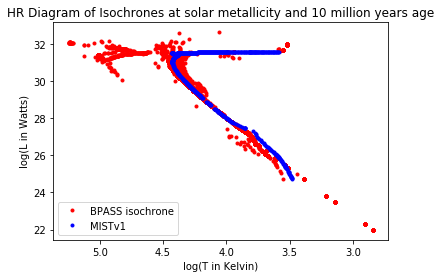

In [37]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b.", label="MISTv1")
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit

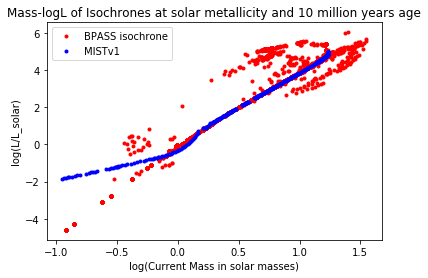

In [38]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b.", label="MISTv1")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("Mass-logL of Isochrones at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

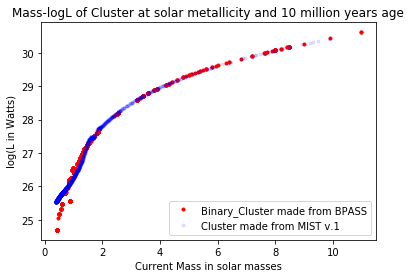

In [39]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", alpha = 1)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Cluster made from MIST v.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

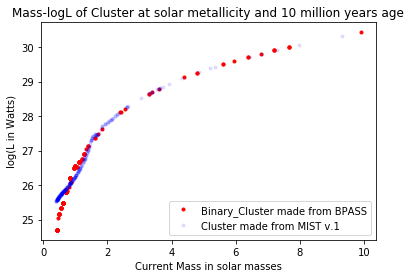

In [40]:
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Cluster made from MIST v.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Inspecting what masses are represented by the cluster

In [41]:
np.unique((clus_1.companions['mass_current']))

0.42
0.45
0.45504
0.46376000000000006
0.5
0.56
0.6
0.7
0.72
0.75
0.8


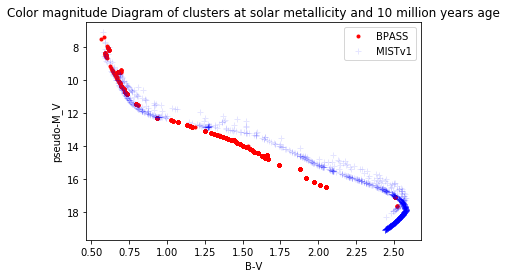

In [42]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(100), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(100), "b+", label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("pseudo-M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

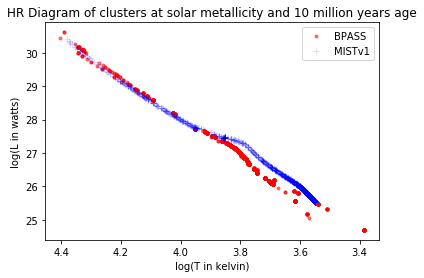

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="MISTv1", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at solar metallicity and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [44]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([236, 243, 244, 281, 294])

Black Holes?

In [45]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

Do we have any neutron stars?

In [46]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Let's make sure that I am getting just about enough star mass for my cluster. (It was a bug before I used an adjustment factor.)

In [47]:
clus_1.star_systems['systemMass'].sum()

2225.2653487757316

In [48]:
clus_2.star_systems['systemMass'].sum()

2000.9439639209247

In [49]:
len(np.where(clus_1.star_systems['merged'])[0])

133

What systems do all of these companions correspond to?

In [50]:
clus_1.companions[['system_idx']]

system_idx
int64
0
1
1
2
3
4
5
6
6


Showing the current-mass and current-luminosity relationship

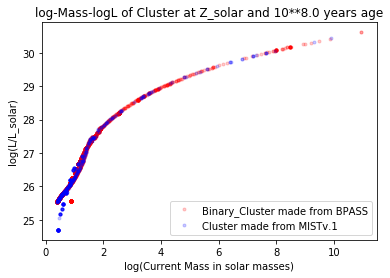

In [51]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =0.2)
plt.plot(clus_2.star_systems['mass_current'], np.log10(clus_2.star_systems["L"]), "r.", alpha =0.2)
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "b.", label="Cluster made from MISTv.1", alpha =0.2)
plt.plot(clus_2.companions['mass_current'], np.log10(clus_2.companions["L"]), "b.", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at Z_solar and 10**8.0 years age")
plt.legend()

What phases exist in the cluster?

In [52]:
np.unique(clus_1.star_systems['phase'])

5.0
101.0


In [53]:
np.unique(clus_1.companions['phase'])

-99
5
101
